# Analyze grid search results to identigy the best models

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [1]:
State = '_Connecticut'
State = ''

for initial_state in ['A', 'D', 'U']:
    print(f'\nInitial state: {initial_state}')
    for model in ['mlp']: #['xgb', 'mlp']:
        model_path = f'../Results/Grid_search/grid_search_log_{model}{State}_thermal_{initial_state}.csv'
        grid_search_df = pd.read_csv(model_path)
        grid_search_df = grid_search_df.loc[grid_search_df['level']=='L3-full']
        best_idx = grid_search_df['min_val_loss'].idxmin()
        best_row = grid_search_df.loc[best_idx]

        score = best_row['min_val_loss']
        build_params = best_row['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
        training_params = best_row['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
        print(f'   {model}')
        print(f'       Cross-entropy: {score}')
        print(f'        build_kw = {build_params}')
        print(f'        train_kw = {training_params}')


Initial state: A


NameError: name 'pd' is not defined

In [31]:
best_idx = grid_search_df['min_val_loss'].idxmin()
best_row = grid_search_df.loc[best_idx]
print(best_row)

level                                                     L3-full
model_name                                           xgboostModel
build_params    {"device": "cuda"; "early_stopping_rounds": 10...
train_params                               {"weights_data": true}
min_val_loss                                             0.065329
timestamp                        2025-11-06T09:51:06.595458-05:00
Name: 1014, dtype: object


In [44]:
grid_search_df

,level,model_name,build_params,data_params,train_params,state,val_loss_per_logit,score,timestamp
0,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008326867889502294, 0.0007244...",2025-11-23T04:53:50.879978-05:00
1,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008388343734337928, 0.0007253...",2025-11-23T10:54:28.823377-05:00
2,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008384070323230342, 0.0007249...",2025-11-23T05:02:15.653774-05:00
3,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0522069406...","{'val_loss': [0.0008307771035139925, 0.0007226...",2025-11-23T05:33:43.198694-05:00
4,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0522069406...","{'val_loss': [0.0008339077972929708, 0.0007225...",2025-11-23T11:34:43.869248-05:00
...,...,...,...,...,...,...,...,...,...
168,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[2.8583431937...","{'val_loss': [0.000865845465559007, 0.00077460...",2025-11-24T00:39:49.057227-05:00
169,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[0.0, 1.55266...","{""best_epoch"": [40; 62; 63; 34; 52]; ""val_loss...",2025-11-24T16:27:47.870584-05:00
170,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[0.0, 0.0, 0....","{""best_epoch"": [65; 36; 50; 51; 68]; ""val_loss...",2025-11-24T17:10:01.642228-05:00
171,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[0.0, 0.0, 0....","{""best_epoch"": [82; 75; 13; 83; 64]; ""val_loss...",2025-11-24T18:39:00.735367-05:00


In [ ]:
State = '_New York'
# State = ''

for initial_state in ['A']:#, 'D', 'U']:
    for end_state in ['A', 'D', 'U', 'all']:
        if initial_state == end_state:
            continue
        print(f'\n{initial_state} -> {end_state}')
        try:
            for model in ['mlp']: #['xgb', 'mlp']:
                model_path = f'../Results/Grid_search/grid_search_log_{model}{State}_thermal_{initial_state}_{end_state}.csv'
                grid_search_df = pd.read_csv(model_path)
                grid_search_df = grid_search_df.loc[grid_search_df['level']=='L3-full']
                best_idx = grid_search_df['min_val_loss'].idxmin()
                best_row = grid_search_df.loc[best_idx]

                score = best_row['min_val_loss']
                build_params = best_row['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
                training_params = best_row['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
                print(f'   {model}')
                print(f'       Cross-entropy: {score}')
                print(f'        build_kw = {build_params}')
                print(f'        train_kw = {training_params}')
        except FileNotFoundError:
            print('   No results found.')

# Grid search focal loss

In [4]:
def string2dict(s: str) -> dict:
    s = s.strip("defaultdict(<class 'list'>, ")
    if ',' in s:
        op = ','
    elif ';' in s:
        op = ';'
    else:
        op = ','
        # raise ValueError('Unexpected format')
    s = s.split(op)
    d = {}
    key = None
    value = None
    cont = False
    for item in s:
        if ':' in item:
            if value is not None and key is not None:
                raise ValueError('Unexpected format')
            k,v = item.split(':')
            k = k.replace('{', '').replace('}', '').replace('"', '').strip()
            v = v.replace('{', '').replace('}', '').replace('"', '').strip()
            if '[' in v:
                if not ']' in v:
                    cont = True
                key = k
                value = []
                v = v.replace('[', '').replace(']', '').strip()
                if v == 'false':
                    value.append(False)
                elif v == 'true':
                    value.append(True)
                elif '.' in v:
                    try:
                        value.append(float(v))
                    except:
                        value.append(v)
                elif v != '':
                    try:
                        value.append(int(v))
                    except:
                        value.append(v)
            else:
                key = k
                if v == 'false':
                    value = False
                elif v == 'true':
                    value = True
                elif '.' in v:
                    try:
                        value = float(v)
                    except:
                        value = v
                elif v != '':
                    try:
                        value = int(v)
                    except:
                        value = v
        else:
            if ']' in item:
                cont = False
            v = item.replace(']', '').replace('{', '').replace('}', '').replace('"', '').strip()
            if v == 'false':
                value.append(False)
            elif v == 'true':
                value.append(True)
            elif '.' in v:
                    try:
                        value.append(float(v))
                    except:
                        value.append(v)
            elif v != '':
                try:
                    value.append(int(v))
                except:
                    value.append(v)
            if ']' in item:
                cont = False
        
        if not cont:
            if type(value) == list:
                value = tuple(value)
                key = key.replace("'", "")
            d[key] = value
            key = None
            value = None
    return d

In [5]:
def string_logit(s: str) -> dict:
    s = s.strip("defaultdict(<class 'list'>, ").strip('{').strip('}')
    if ',' in s:
        op = ','
    elif ';' in s:
        op = ';'
    else:
        op = ';'
        # raise ValueError('Unexpected format')
    s = s.split(':')
    logit = int(s[0])
    s = s[1:]
    d = {}
    for e in s:
        next_logit = e.split(op)[-1]
        if not ']' in next_logit and not ')' in next_logit and not '}' in next_logit:
            next_logit = int(next_logit.strip())
            values = e.split(op)[:-1]
        else:
            values = e.split(op)
        values_clean = []
        for v in values:
            v= v.strip()
            if v.startswith('['):
                values_clean.append([])
                v = v.replace('[', '').strip()
            v = v.replace(')', '').replace('}', '').replace(']', '').strip()
            values_clean[-1].append(float(v))
        d[logit] = values_clean
        logit = next_logit
    return d

In [6]:
def add_value(key, value, dict, length):
    if key in dict:
        dict[key].append(value)
    else:
        dict[key] = [None]*length
        dict[key].append(value)


In [7]:
def get_grid_search_df(path:str) -> pd.DataFrame:
    grid_search_raw_df = pd.read_csv(path)
    cols = ['level', 'model_name', 'state', 'timestamp']
    data_dict = defaultdict(list)
    l = 0
    for idx,row in grid_search_raw_df.iterrows():
        fields = list(data_dict.keys())
        add_value('index', idx, data_dict, l)
        fields.remove('index') if 'index' in fields else None
        for col in cols:
            data_dict[col].append(getattr(row, col))
            fields.remove(col) if col in fields else None
        build_params = string2dict(row['build_params'])
        data_params = string2dict(row['data_params'])
        train_params = string2dict(row['train_params'])
        val_loss_per_logit = string_logit(row['val_loss_per_logit'])
        score = string2dict(row['score'])
        # print(score)
        for k, v in build_params.items():
            c = f'build_{k}'
            add_value(c, v, data_dict, l)
            fields.remove(c) if c in fields else None
            # data_dict[f'build_{k}'].append(v)
        for k, v in data_params.items():
            c= f'data_{k}'
            add_value(c, v, data_dict, l)
            fields.remove(c) if c in fields else None
            # data_dict[f'data_{k}'].append(v)
        for k, v in train_params.items():
            c = f'train_{k}'
            add_value(c, v, data_dict, l)
            fields.remove(c) if c in fields else None
            # data_dict[f'train_{k}'].append(v)
        for k, v in val_loss_per_logit.items():
            c = f'val_loss_{k}'
            add_value(c, v, data_dict, l)
            fields.remove(c) if c in fields else None
            # data_dict[f'val_loss_{k}'].append(v)
        for k, v in score.items():
            c = f'score_{k}'
            add_value(c, v, data_dict, l)
            fields.remove(c) if c in fields else None
            # data_dict[f'score_{k}'].append(v)
        l += 1
        for c in fields:
            add_value(c, None, data_dict, l)
    grid_search_df = pd.DataFrame(data_dict)
    
    return grid_search_df, grid_search_raw_df

In [8]:
def mean_ignore_nan(lst):
    try:
        return np.mean([x for x in lst if not np.isnan(x)])
    except:
        return np.nan

def median_ignore_nan(lst):
    try:
        return np.median([x for x in lst if not np.isnan(x)])
    except:
        return np.nan

def min_ignore_nan(lst):
    try:
        return np.min([x for x in lst if not np.isnan(x)])
    except:
        return np.nan

def max_ignore_nan(lst):
    try:
        return np.max([x for x in lst if not np.isnan(x)])
    except:
        return np.nan

In [9]:
def mean_logit_score(val_loss, best_epochs) -> float:
    n = len(best_epochs)
    logit_losses = []
    for i in range(n):
        ep = best_epochs[i]
        logit_loss = val_loss[i][ep-1]
        logit_losses.append(logit_loss)
    return np.mean(logit_losses)
def min_logit_score(val_loss, best_epochs) -> float:
    n = len(best_epochs)
    logit_losses = []
    for i in range(n):
        ep = best_epochs[i]
        logit_loss = val_loss[i][ep-1]
        logit_losses.append(logit_loss)
    return np.min(logit_losses)
def max_logit_score(val_loss, best_epochs) -> float:
    n = len(best_epochs)
    logit_losses = []
    for i in range(n):
        ep = best_epochs[i]
        logit_loss = val_loss[i][ep-1]
        logit_losses.append(logit_loss)
    return np.max(logit_losses)

In [319]:
grid_search_focal_loss, grid_search_raw_df = get_grid_search_df('../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_all.csv')

In [320]:
def get_best(filename, metric='min_val_loss'):
    grid_search_focal_loss, grid_search_raw_df = get_grid_search_df(filename)

    grid_search_focal_loss["mean_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: mean_ignore_nan(x))
    grid_search_focal_loss["max_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: max_ignore_nan(x))
    grid_search_focal_loss["min_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: min_ignore_nan(x))

    grid_search_focal_loss['mean_logit_loss'] = grid_search_focal_loss.apply(lambda row: mean_logit_score(row['val_loss_1'], row['score_best_epoch']), axis=1)
    grid_search_focal_loss['min_logit_loss'] = grid_search_focal_loss.apply(lambda row: min_logit_score(row['val_loss_1'], row['score_best_epoch']), axis=1)
    grid_search_focal_loss['max_logit_loss'] = grid_search_focal_loss.apply(lambda row: max_logit_score(row['val_loss_1'], row['score_best_epoch']), axis=1)

    ########### CE model ###########

    ce_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                    & (grid_search_focal_loss['train_focal_loss_gamma']==0.0)
                                    # & (grid_search_focal_loss['train_focal_loss_alpha']==(1.0,1.0))
                                    &(grid_search_focal_loss['train_focal_loss_alpha']==(1.0,1.0,1.0))
                                    # &(grid_search_focal_loss['build_hidden_sizes']==(128, 64, 64, 32, 32, 32, 16, 16))
                                    & (grid_search_focal_loss['train_focal_loss_alpha_schedule']=='constant'))].copy().reset_index(drop=True)


    best_ce = ce_df.iloc[ce_df[metric].idxmin()]
    idx_ce = best_ce['index']
    raw_row_ce = grid_search_raw_df.loc[idx_ce]
    build_kw_ce = raw_row_ce['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    data_kw_ce = raw_row_ce['data_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    train_kw_ce = raw_row_ce['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')

    # del data_kw_ce['k_folds']

    print('Best CE model:')
    print(f"        Mean : {best_ce['mean_val_loss']}   |   Min : {best_ce['min_val_loss']}   |   Max : {best_ce['max_val_loss']}")
    print(f"        Mean : {best_ce['mean_logit_loss']}   |   Min : {best_ce['min_logit_loss']}   |   Max : {best_ce['max_logit_loss']}")
    print(f"        Mean best epoch : {np.mean(best_ce['score_best_epoch'])}")
    print(f"\n        build_kw = {build_kw_ce}")
    print(f"        data_kw = {data_kw_ce}")
    print(f"        train_kw = {train_kw_ce}")

    ########### FOCAL schedule model ###########

    focal_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                           & (grid_search_focal_loss['train_focal_loss_gamma']!=0.0)
                                        #    &(grid_search_focal_loss['build_hidden_sizes']==(128, 64, 64, 32, 32, 32, 16, 16))
                                    & (grid_search_focal_loss['train_focal_loss_alpha_schedule']=='constant'))].copy().reset_index(drop=True)

    best_focal = focal_df.iloc[focal_df[metric].idxmin()]
    idx_focal = best_focal['index']
    raw_row_focal = grid_search_raw_df.loc[idx_focal]

    build_kw_focal = raw_row_focal['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    data_kw_focal = raw_row_focal['data_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    train_kw_focal = raw_row_focal['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')

    # del data_kw_focal['k_folds']
    print('\n\n######\n\n')
    print('Best Focal Loss model:')
    print(f"        Mean : {best_focal['mean_val_loss']}   |   Min : {best_focal['min_val_loss']}   |   Max : {best_focal['max_val_loss']}")
    print(f"        Mean : {best_focal['mean_logit_loss']}   |   Min : {best_focal['min_logit_loss']}   |   Max : {best_focal['max_logit_loss']}")
    print(f"        Mean best epoch : {np.mean(best_focal['score_best_epoch'])}")
    print(f"\n        build_kw = {build_kw_focal}")
    print(f"        data_kw = {data_kw_focal}")
    print(f"        train_kw = {train_kw_focal}")


    ########### BEST overall model ###########

    overall_df = grid_search_focal_loss.loc[(grid_search_focal_loss['train_focal_loss_gamma_schedule']!='constant')].copy().reset_index(drop=True)
    # overall_df = grid_search_focal_loss.copy().reset_index(drop=True)

    best_overall = overall_df.iloc[overall_df[metric].idxmin()]
    idx_overall = best_overall['index']
    raw_row_overall = grid_search_raw_df.loc[idx_overall]

    build_kw_overall = raw_row_overall['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    data_kw_overall = raw_row_overall['data_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    train_kw_overall = raw_row_overall['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')

    # del data_kw_overall['k_folds']
    print('\n\n######\n\n')
    print('Best overall model:')
    print(f"        Mean : {best_overall['mean_val_loss']}   |   Min : {best_overall['min_val_loss']}   |   Max : {best_overall['max_val_loss']}")
    print(f"        Mean : {best_overall['mean_logit_loss']}   |   Min : {best_overall['min_logit_loss']}   |   Max : {best_overall['max_logit_loss']}")
    print(f"        Mean best epoch : {np.mean(best_overall['score_best_epoch'])}")
    print(f"\n        build_kw = {build_kw_overall}")
    print(f"        data_kw = {data_kw_overall}")
    print(f"        train_kw = {train_kw_overall}")


In [321]:
get_best('../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_all.csv', metric='mean_val_loss') #mean_val_loss, mean_logit_loss

Best CE model:
        Mean : 0.006486516696989661   |   Min : 0.005945822842997403   |   Max : 0.006882683333833065
        Mean : 2.172302184655382   |   Min : 1.9678307453184638   |   Max : 2.7032149120043685
        Mean best epoch : 75.6

        build_kw = {"activations": ["relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu"], "feature_cols": ["1d_load_sum", "24h_max_load", "24h_min_load", "2d_load_sum", "CDD", "CDD3d", "DayOfWeek_cos", "DayOfWeek_sin", "DayOfYear_cos", "DayOfYear_sin", "Dew_point_temperature", "Extreme_cold", "Extreme_heat", "FDD", "FDD3d", "HDD", "HDD3d", "Heat_index", "Heat_index_isnan", "Holiday", "Hourly_load_change", "Load", "Month_cos", "Month_sin", "Precip_1d", "Precip_3d", "Precipitation", "Pressure_3hr_change", "Relative_humidity", "Sea_level_pressure", "Season_cos", "Season_sin", "Snow_depth", "Station_level_pressure", "Temperature", "Tmax", "Tmean", "Tmin", "Weekend", "Wet_bulb_temperature", "Wind_chill", "Win

### Cross entropy baseline

In [202]:
cross_entropy_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                               & (grid_search_focal_loss['train_focal_loss_gamma']==0.0)
                                               & (grid_search_focal_loss['train_focal_loss_alpha']==(1.0,1.0))
                                               & (grid_search_focal_loss['train_focal_loss_alpha_schedule']=='constant'))].copy().reset_index(drop=True)

best_ce = cross_entropy_df.iloc[cross_entropy_df['mean_val_loss'].idxmin()]
print('Best cross-entropy model:')
print(best_ce)
idx = best_ce['index']
print(f"\nInitial df row index: {idx}")
raw_row = grid_search_raw_df.loc[idx]
build_kw = raw_row['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
data_kw = raw_row['data_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
train_kw = raw_row['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
print(f'Build params: {build_kw}')
print(f'Data params: {data_kw}')
print(f'Train params: {train_kw}')

Best cross-entropy model:
index                                                                             253
level                                                                         L3-full
model_name                                                                        MLP
state                                                                             NaN
timestamp                                            2025-11-25T06:21:15.739027-05:00
build_activations                   (relu, relu, relu, relu, relu, relu, relu, rel...
build_feature_cols                  (1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...
build_hidden_sizes                  (128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...
build_num_classes                                                                   2
build_target_cols                                                  (Final_gen_state,)
data_k_folds                                                                        5
data_reweight_power         

### focal loss with scheduling


Best focal loss model with gamma schedule constant: 0.0007847784788060216
        build_kw = {"activations": ["relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu", "relu"], "feature_cols": ["1d_load_sum", "24h_max_load", "24h_min_load", "2d_load_sum", "CDD", "CDD3d", "DayOfWeek_cos", "DayOfWeek_sin", "DayOfYear_cos", "DayOfYear_sin", "Dew_point_temperature", "Extreme_cold", "Extreme_heat", "FDD", "FDD3d", "HDD", "HDD3d", "Heat_index", "Heat_index_isnan", "Holiday", "Hourly_load_change", "Load", "Month_cos", "Month_sin", "Precip_1d", "Precip_3d", "Precipitation", "Pressure_3hr_change", "Relative_humidity", "Sea_level_pressure", "Season_cos", "Season_sin", "Snow_depth", "Station_level_pressure", "Temperature", "Tmax", "Tmean", "Tmin", "Weekend", "Wet_bulb_temperature", "Wind_chill", "Wind_chill_isnan", "Wind_speed"], "hidden_sizes": [128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64], "num_classes": 2, "target_cols": ["Final_gen_state"]}
        data_kw 

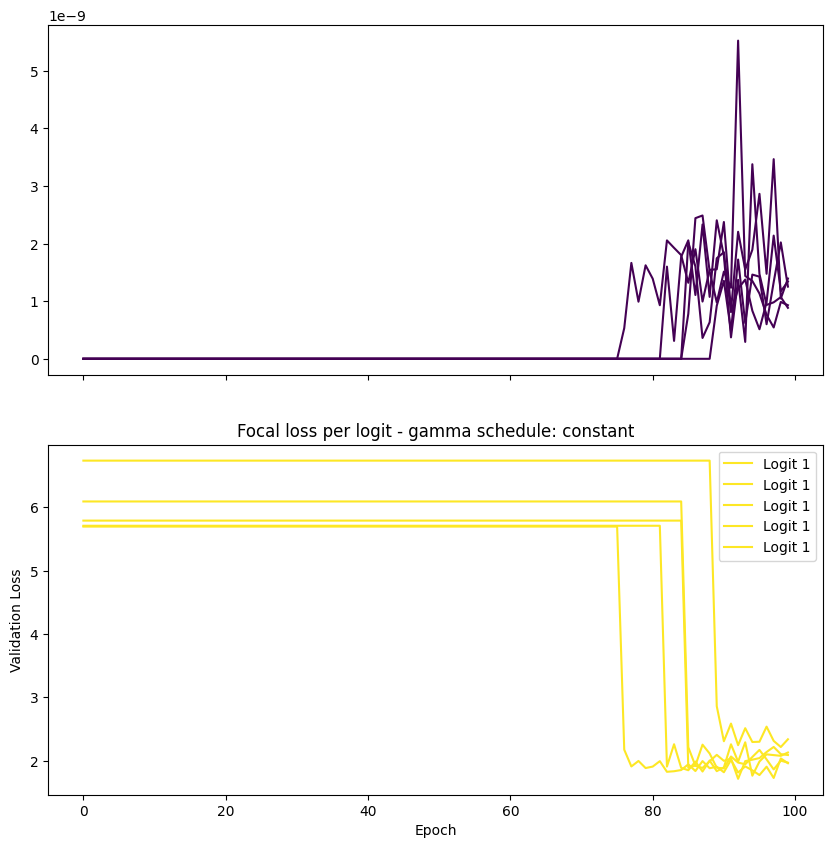

In [210]:
for gamma_schedule in ['constant']:#, 'linear', 'exponential', 'cosine']:
    filtered_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']==gamma_schedule)
                                            & (grid_search_focal_loss['train_focal_loss_gamma']!=0.0))].copy().reset_index(drop=True)
    best = filtered_df.iloc[filtered_df['mean_val_loss'].idxmin()]
    score = best['mean_val_loss']
    print(f'\nBest focal loss model with gamma schedule {gamma_schedule}: {score}')
    
    idx = best['index']
    
    raw_row = grid_search_raw_df.loc[idx]
    build_kw = raw_row['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    data_kw = raw_row['data_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    train_kw = raw_row['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
    print(f'        build_kw = {build_kw}')
    print(f'        data_kw = {data_kw}')
    print(f'        train_kw = {train_kw}')

    logit_loss = string_logit(raw_row['val_loss_per_logit'])
    for logit, losses in logit_loss.items():
        print(f'            Logit {logit}: min val loss = {np.min(np.array(losses)[:,-1])}, mean val loss = {np.mean(np.array(losses)[:,-1])}, max val loss = {np.max(np.array(losses)[:,-1])}')
    fig, axs = plt.subplots(len(logit_loss),1, figsize=(10, 5*len(logit_loss)), sharex=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(logit_loss)))
    for logit, losses in logit_loss.items():
        print(np.array(losses).shape)
        ax = axs[logit] if len(logit_loss) > 1 else axs
        for i, loss in enumerate(losses):
            ax.plot(loss, label=f'Logit {logit}', color=colors[logit])
    ax.set_title(f'Focal loss per logit - gamma schedule: {gamma_schedule}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Loss')
    ax.legend()
    plt.show()


In [225]:
l = [0,1,2,0]
l.index(0)




0

### Models comparison

In [191]:
grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique()

array(['constant'], dtype=object)

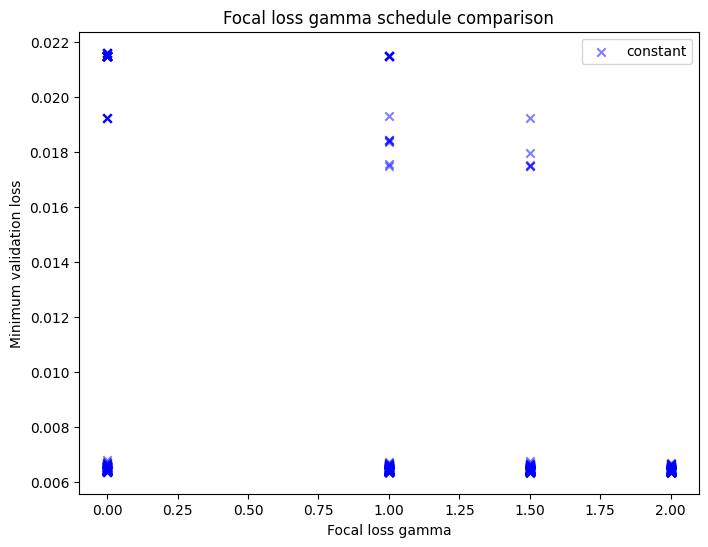

In [195]:
# compare different gammas
colors = {'constant': 'blue', 'linear': 'orange', 'exponential': 'green', 'cosine': 'red'}
fig, ax = plt.subplots(figsize=(8,6))
for schedule in grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique():
    schedule_df = grid_search_focal_loss.loc[grid_search_focal_loss['train_focal_loss_gamma_schedule']==schedule]
    ax.scatter(schedule_df['train_focal_loss_gamma'], schedule_df['max_val_loss'], color=colors[schedule], marker='x', label=schedule, alpha=0.5)
ax.set_xlabel('Focal loss gamma')
ax.set_ylabel('Minimum validation loss')
# ax.set_ylim(bottom=0.007, top=0.008)
ax.set_title('Focal loss gamma schedule comparison')
# ax.set_yscale('log')
ax.legend()

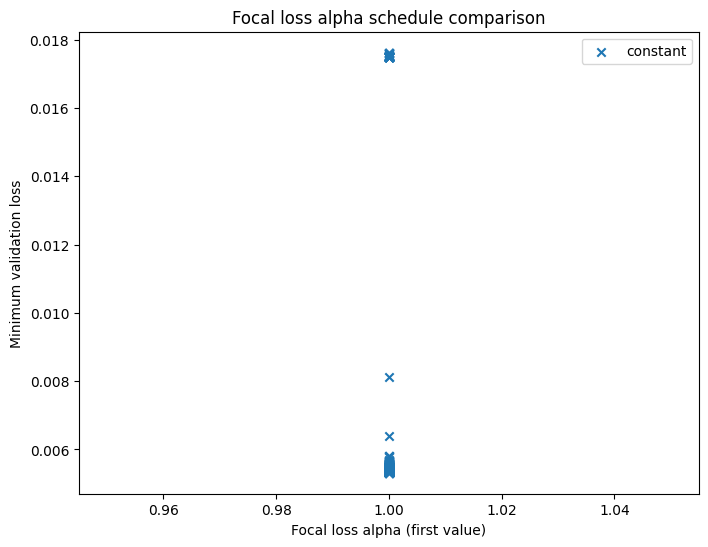

In [196]:
# Compare different alphas
fig, ax = plt.subplots(figsize=(8,6))
for schedule in grid_search_focal_loss['train_focal_loss_alpha_schedule'].unique():
    schedule_df = grid_search_focal_loss.loc[grid_search_focal_loss['train_focal_loss_alpha_schedule']==schedule]
    alphas = schedule_df['train_focal_loss_alpha'].apply(lambda x: x[0] if type(x)==tuple else x)
    ax.scatter(alphas, schedule_df['min_val_loss'], marker='x', label=schedule)
ax.set_xlabel('Focal loss alpha (first value)')
ax.set_ylabel('Minimum validation loss')
ax.set_title('Focal loss alpha schedule comparison')
# ax.set_yscale('log')
ax.legend()

# Junk

In [ ]:
get_grid_search_df

In [12]:
State = '_New York'
# State = ''
grid_searches = {}
grid_searches_raw = {}
for initial_state in ['A', 'D', 'U']:
    for end_state in ['A', 'D', 'U', 'all']:
        if initial_state == end_state:
            continue
        print(f'\n{initial_state} -> {end_state}')
        try:
            for model in ['mlp']: #['xgb', 'mlp']:
                model_path = f'../Results/Grid_search/grid_search_log_{model}{State}_thermal_{initial_state}_{end_state}.csv'
                grid_search_df, grid_search_raw_df = get_grid_search_df(model_path)
                grid_searches[(initial_state, end_state, model)] = grid_search_df
                grid_searches_raw[(initial_state, end_state, model)] = grid_search_raw_df
        except FileNotFoundError:
            print('   No results found.')


A -> D

A -> U

A -> all

D -> A

D -> U

D -> all
   No results found.

U -> A

U -> D

U -> all
   No results found.


In [16]:
df = grid_searches[('A', 'D', 'mlp')]
df

,index,level,model_name,state,reweight_train_data_density,min_val_loss,timestamp,build_activations,build_feature_cols,build_hidden_sizes,...,train_focal_loss_gamma,train_focal_loss_gamma_schedule,train_grad_clip_norm,train_lambda_reg,train_loss,train_lr,train_lr_scheduler,train_optimizer,train_regularization_type,train_weights_data
0,0,L3-full,MLP,NaN,Temperature,0.000760,2025-11-20T20:37:52.556136-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,0.00,constant,1.0,0.050,focal_loss,5e-05,constant,adam,L2,True
1,1,L3-full,MLP,NaN,Temperature,0.000772,2025-11-20T20:39:47.682440-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,0.00,constant,1.0,0.050,focal_loss,5e-05,linear,adam,L2,True
2,2,L3-full,MLP,NaN,Temperature,0.000890,2025-11-20T20:41:44.666838-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,0.00,constant,1.0,0.050,focal_loss,5e-05,exponential,adam,L2,True
3,3,L3-full,MLP,NaN,Temperature,0.000774,2025-11-20T20:43:41.517771-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,0.00,constant,1.0,0.050,focal_loss,5e-05,cosine,adam,L2,True
4,4,L3-full,MLP,NaN,Temperature,NaN,2025-11-20T20:43:44.101059-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,0.25,constant,1.0,0.050,focal_loss,5e-05,constant,adam,L2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,L3-full,MLP,NaN,Temperature,0.000722,2025-11-21T13:10:08.751987-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,1.25,constant,1.0,0.005,focal_loss,5e-05,constant,adam,L2,True
716,716,L3-full,MLP,NaN,Temperature,0.000727,2025-11-21T13:12:06.854126-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,1.25,constant,1.0,0.005,focal_loss,5e-05,linear,adam,L2,True
717,717,L3-full,MLP,NaN,Temperature,0.000851,2025-11-21T13:14:03.611672-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,1.25,constant,1.0,0.005,focal_loss,5e-05,exponential,adam,L2,True
718,718,L3-full,MLP,NaN,Temperature,0.000729,2025-11-21T13:16:01.860052-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(256, 512, 512, 256, 128, 64, 64, 64, 64, 64)",...,1.25,constant,1.0,0.005,focal_loss,5e-05,cosine,adam,L2,True


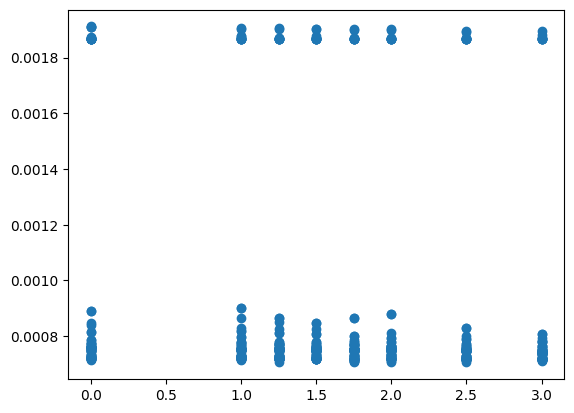

In [17]:
feature = 'train_focal_loss_gamma'

f = df[feature].values
val_loss = df['min_val_loss'].values

plt.plot(f, val_loss, 'o')

In [22]:
print(df.columns)

Index(['index', 'level', 'model_name', 'state', 'reweight_train_data_density',
       'min_val_loss', 'timestamp', 'build_activations', 'build_feature_cols',
       'build_hidden_sizes', 'build_num_classes', 'build_target_cols',
       'train_batch_size', 'train_device', 'train_early_stopping',
       'train_epochs', 'train_focal_loss_alpha',
       'train_focal_loss_alpha_schedule', 'train_focal_loss_gamma',
       'train_focal_loss_gamma_schedule', 'train_grad_clip_norm',
       'train_lambda_reg', 'train_loss', 'train_lr', 'train_lr_scheduler',
       'train_optimizer', 'train_regularization_type', 'train_weights_data'],
      dtype='object')


In [35]:
def plot_param_vs_val_loss(df: pd.DataFrame):
    params_to_plot = df.columns.tolist()
    rm = {'index', 'level', 'model_name', 'state', 'min_val_loss', 'timestamp'}
    for r in rm:
        if r in params_to_plot:
            params_to_plot.remove(r)
    for r in params_to_plot.copy():
        if df[r].nunique() == 1 and r in params_to_plot:
            params_to_plot.remove(r)

    n_cols = 3
    n_rows = int(np.ceil(len(params_to_plot) / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    for i, param in enumerate(params_to_plot):
        print(f'Plotting {param} ({i+1}/{len(params_to_plot)})')
        row = i // n_cols
        col = i % n_cols
        ax = axs[row, col] if n_rows > 1 else axs[col]
        values = df[param].values
        if any(type(v) in [int, float, bool] for v in values):
            values = values.astype(float)
        if df[param].nunique() == 1:
            continue
        ax.scatter(values, df['min_val_loss'].values)
        ax.set_yscale('log')
        ax.set_xlabel(param)
        ax.set_ylabel('Min validation loss')
        ax.set_title(f'{param}')
    return fig, axs

Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


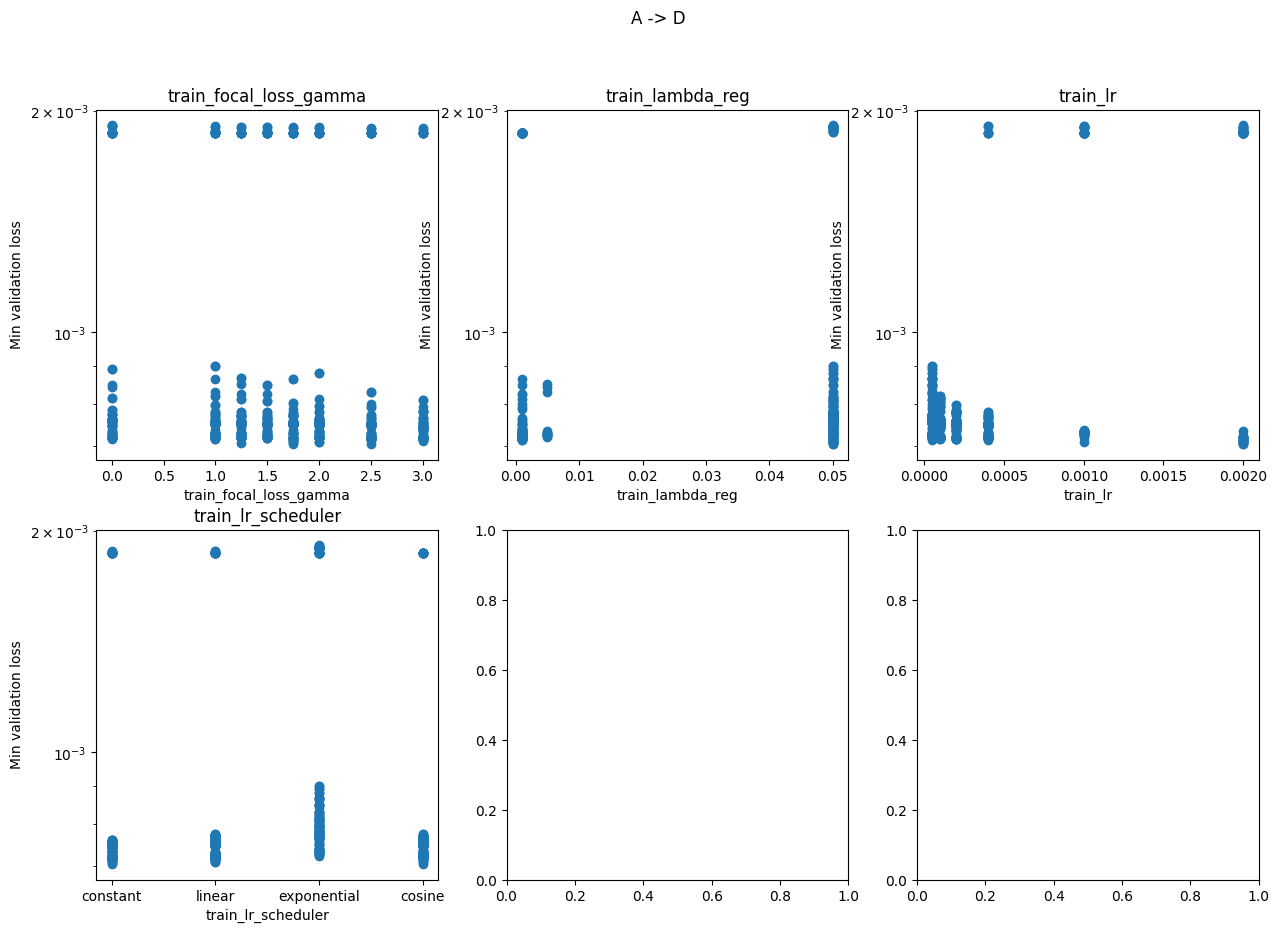

Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


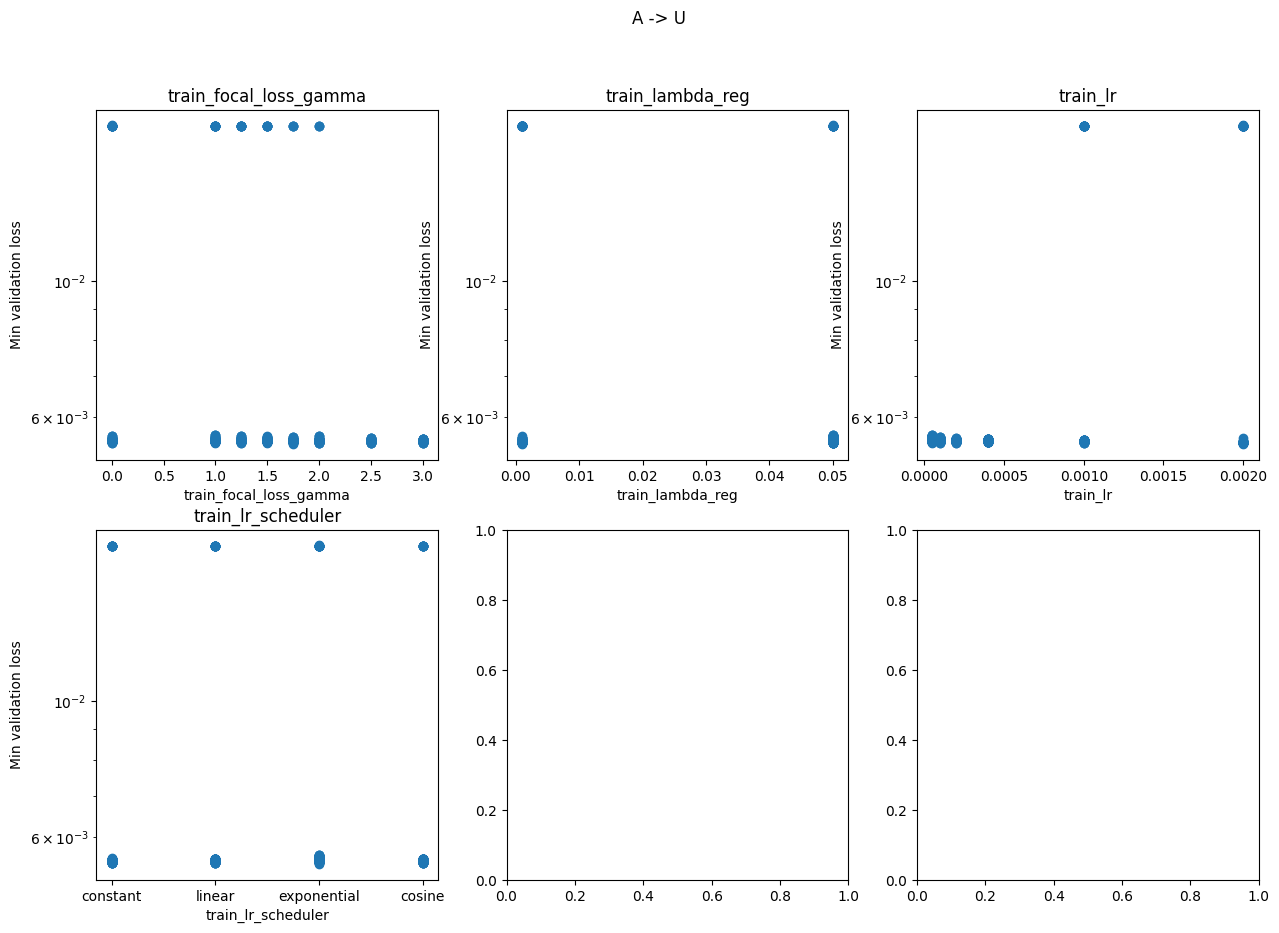

Plotting train_focal_loss_gamma (1/3)
Plotting train_lr (2/3)
Plotting train_lr_scheduler (3/3)


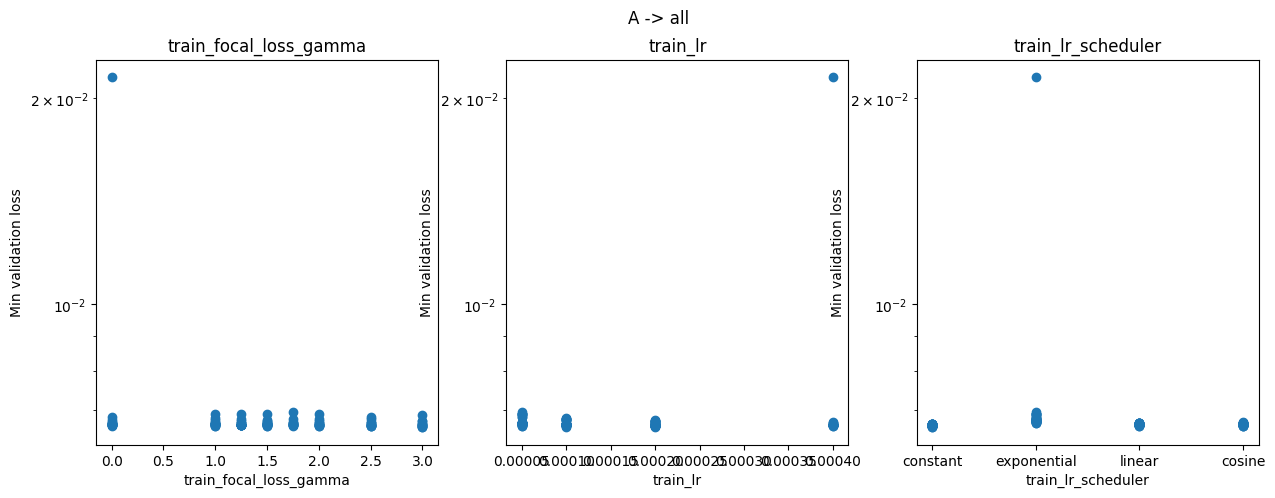

Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


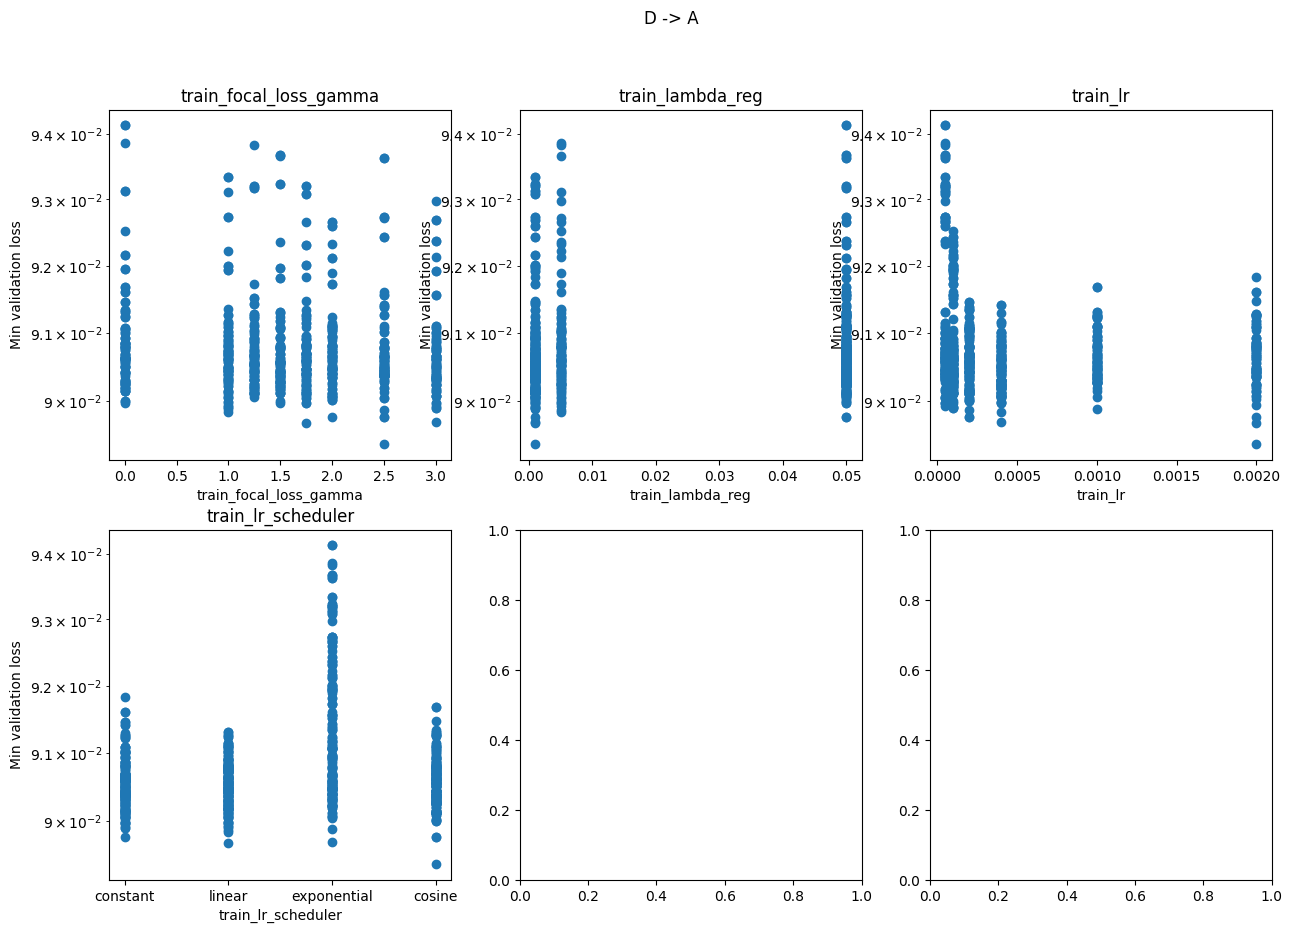

Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


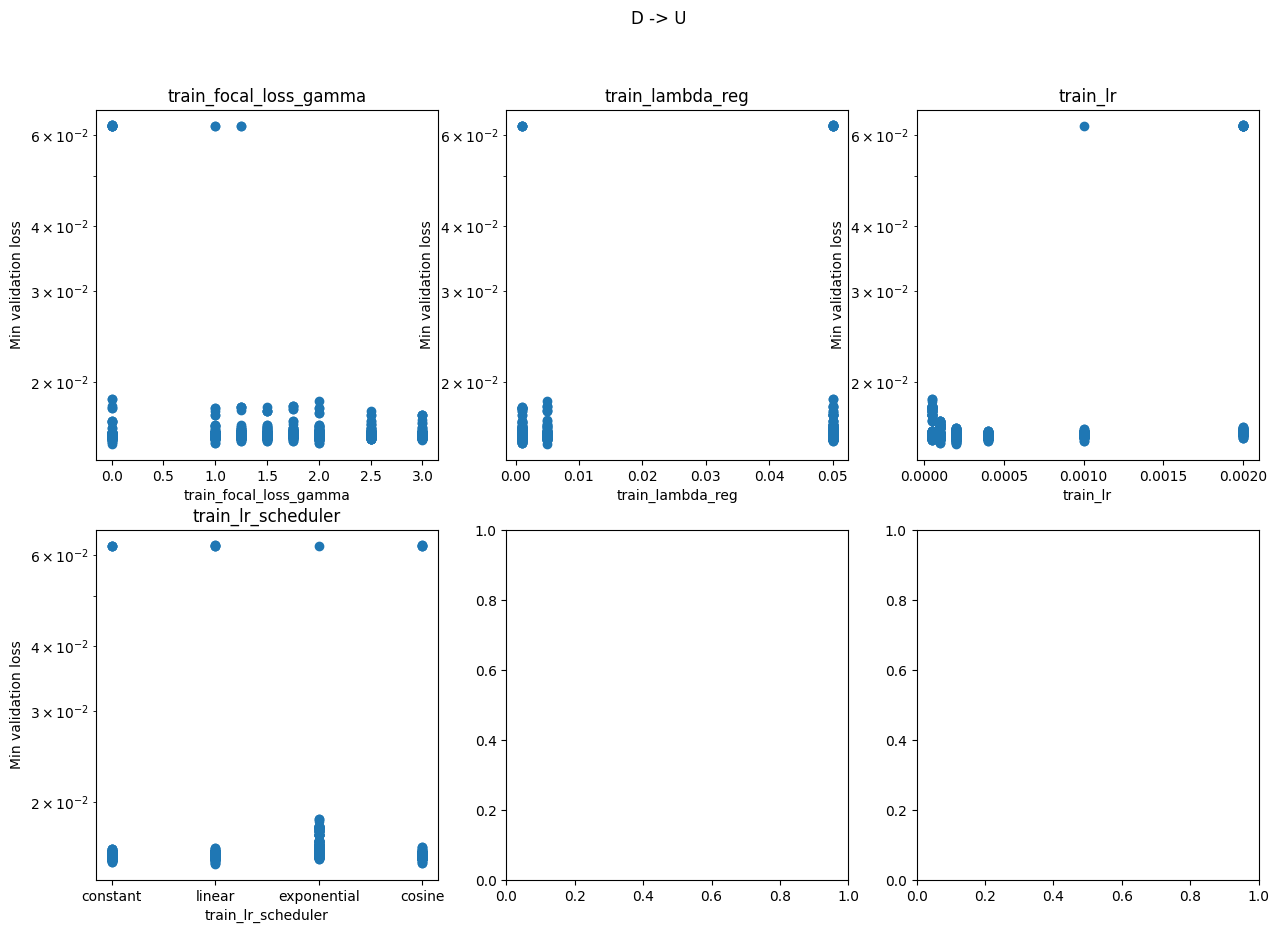

Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


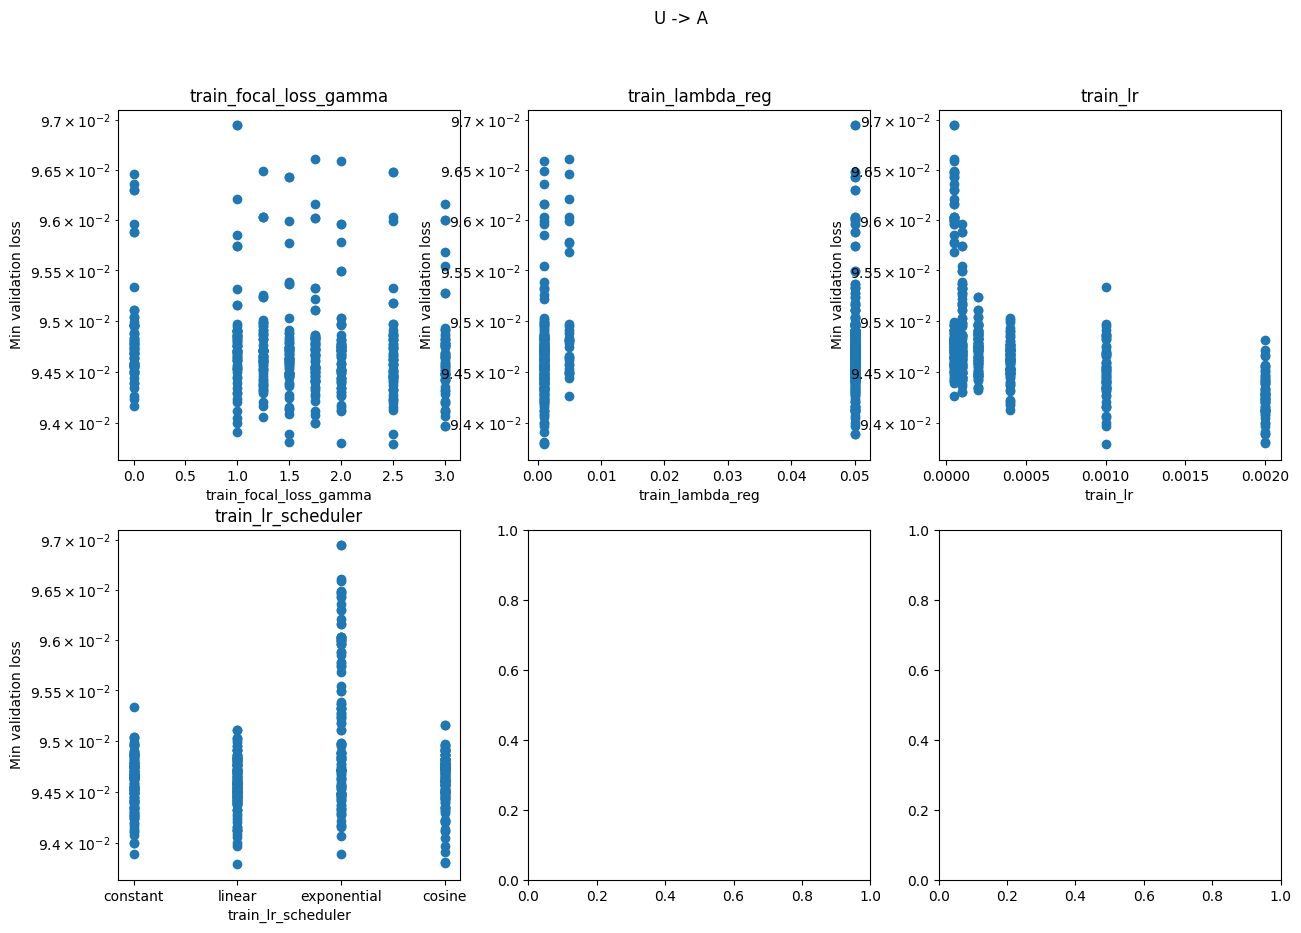

Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


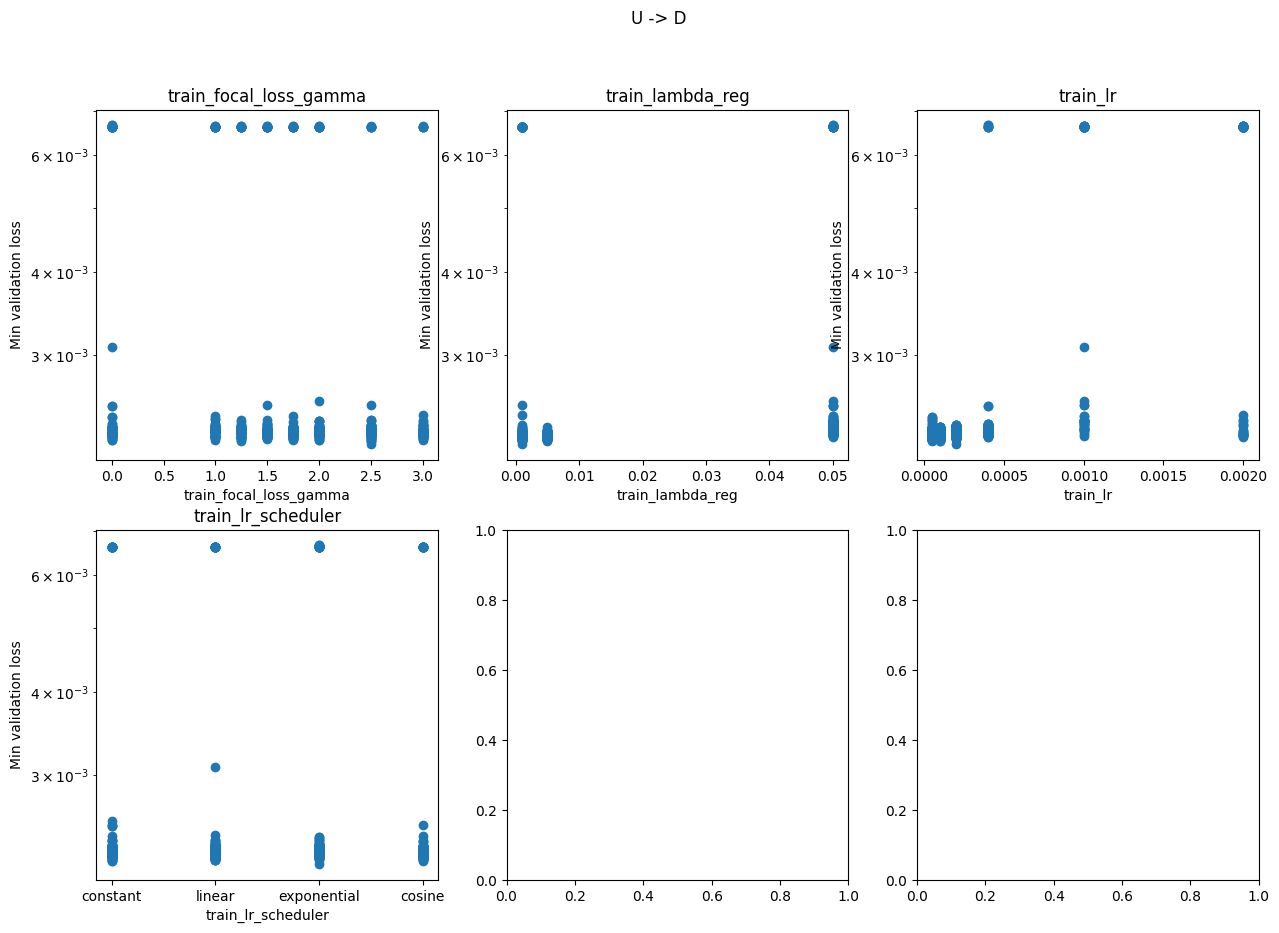

In [36]:
for (i,f, _), df in grid_searches.items():
    # print(f'\nPlotting for {i} -> {f}')
    fig, axs = plot_param_vs_val_loss(df)
    plt.suptitle(f'{i} -> {f}')
    plt.show()



Plotting train_focal_loss_gamma (1/4)
Plotting train_lambda_reg (2/4)
Plotting train_lr (3/4)
Plotting train_lr_scheduler (4/4)


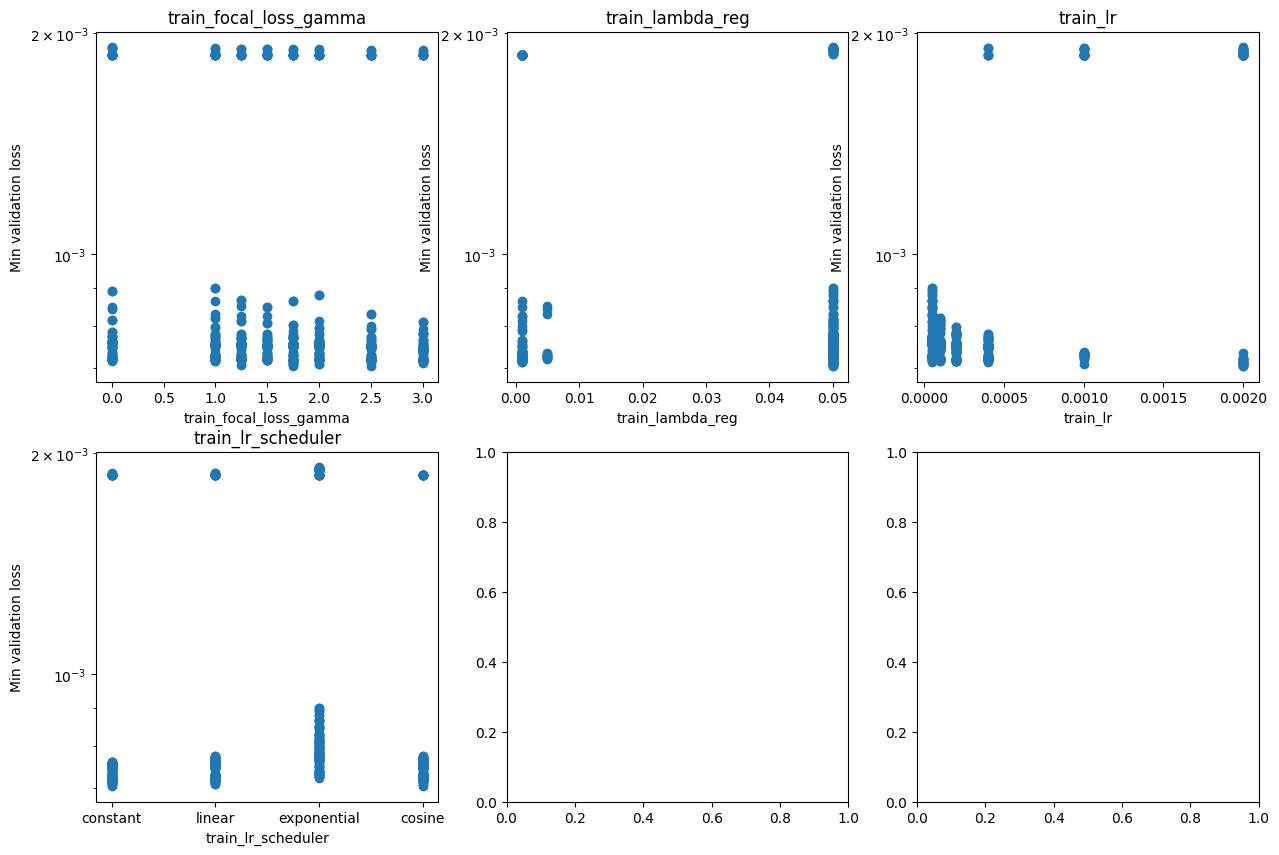

In [32]:
plot_param_vs_val_loss(df)

In [162]:
filename = "../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_D.csv"
df = pd.read_csv(filename)
df

,level,model_name,build_params,data_params,train_params,state,val_loss_per_logit,score,timestamp
0,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008326867889502294, 0.0007244...",2025-11-23T04:53:50.879978-05:00
1,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008388343734337928, 0.0007253...",2025-11-23T10:54:28.823377-05:00
2,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008384070323230342, 0.0007249...",2025-11-23T05:02:15.653774-05:00
3,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0522069406...","{'val_loss': [0.0008307771035139925, 0.0007226...",2025-11-23T05:33:43.198694-05:00
4,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0522069406...","{'val_loss': [0.0008339077972929708, 0.0007225...",2025-11-23T11:34:43.869248-05:00
...,...,...,...,...,...,...,...,...,...
465,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.5; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[8.3528809801...","{""best_epoch"": [84; 89; 85; 88; 97]; ""val_loss...",2025-11-25T10:22:59.933141-05:00
466,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[0.0, 0.0, 0....","{""best_epoch"": [100; 100; 100; 100; 100]; ""val...",2025-11-25T10:27:06.850130-05:00
467,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 2.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[8.4123205943...","{""best_epoch"": [99; 96; 100; 97; 100]; ""val_lo...",2025-11-25T10:28:11.156715-05:00
468,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.8875876149...","{""best_epoch"": [35; 44; 24; 54; 76]; ""val_loss...",2025-11-25T10:29:48.083154-05:00


In [174]:
d = {1:0, 2:2, 3:-1}
l = [(k, v) for k, v in d.items()]
l.sort(key=lambda x: x[1])
l

[(3, -1), (1, 0), (2, 2)]

In [168]:
df = df.groupby(['level', 'model_name', 'build_params', 'data_params', 'train_params']).agg('first').reset_index(drop=False)
df

,level,model_name,build_params,data_params,train_params,state,val_loss_per_logit,score,timestamp
0,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008326867889502294, 0.0007244...",2025-11-23T04:53:50.879978-05:00
1,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008388343734337928, 0.0007253...",2025-11-23T10:54:28.823377-05:00
2,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{""best_epoch"": [100; 100; 100; 100; 100]; ""val...",2025-11-25T05:04:23.536081-05:00
3,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[9.4721261821...","{'val_loss': [0.0008384070323230342, 0.0007249...",2025-11-23T05:02:15.653774-05:00
4,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 0.0; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0522069406...","{'val_loss': [0.0008307771035139925, 0.0007226...",2025-11-23T05:33:43.198694-05:00
...,...,...,...,...,...,...,...,...,...
459,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.5; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0570304728...","{""best_epoch"": [77; 95; 93; 93; 86]; ""val_loss...",2025-11-25T09:32:00.061765-05:00
460,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.5; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[1.0717415129...","{""best_epoch"": [49; 60; 65; 49; 75]; ""val_loss...",2025-11-25T02:50:57.297463-05:00
461,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.5; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[0.0, 0.0, 0....","{""best_epoch"": [50; 75; 77; 76; 95]; ""val_loss...",2025-11-25T10:12:47.900772-05:00
462,L3-full,MLP,"{""activations"": [""relu""; ""relu""; ""relu""; ""relu...","{""k_folds"": 5; ""reweight_power"": 1.5; ""reweigh...","{""batch_size"": 512; ""burn_in"": 30; ""device"": ""...",NaN,"defaultdict(<class 'list'>, {0: [[0.0, 0.0, 0....","{""best_epoch"": [80; 72; 47; 52; 88]; ""val_loss...",2025-11-25T03:31:17.368709-05:00


In [164]:
df.to_csv(filename, index=False)

# Logistic regression

In [298]:
grid_search_focal_loss, grid_search_raw_df = get_grid_search_df('../Results/Grid_search/grid_search_log_logistic_reg_New York_thermal_D_all.csv')
grid_search_focal_loss["mean_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: mean_ignore_nan(x))
grid_search_focal_loss["max_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: max_ignore_nan(x))
grid_search_focal_loss["min_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: min_ignore_nan(x))

In [300]:


best = grid_search_focal_loss.iloc[grid_search_focal_loss['mean_val_loss'].idxmin()]
idx = best['index']
raw_row = grid_search_raw_df.loc[idx]
build_kw = raw_row['build_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
data_kw = raw_row['data_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')
train_kw = raw_row['train_params'].replace(';', ',').replace('true', 'True').replace('false', 'False')


print('Best model:')
print(f"        Mean : {best['mean_val_loss']}   |   Min : {best['min_val_loss']}   |   Max : {best['max_val_loss']}")
print(f"        Mean best epoch : {np.mean(best['score_best_epoch'])}")
print(f"\n        build_kw = {build_kw}")
print(f"        data_kw = {data_kw}")
print(f"        train_kw = {train_kw}")

Best model:
        Mean : 0.08619409207893966   |   Min : 0.0791319818524965   |   Max : 0.09139937526488053
        Mean best epoch : 89.8

        build_kw = {"target_cols": ["Final_gen_state"]}
        data_kw = {"k_folds": 5}
        train_kw = {"batch_size": 512, "burn_in": 10000, "device": "cuda", "early_stopping": True, "epochs": 100, "flat_delta": 2e-05, "flat_mode": "iqr", "flat_patience": 10, "grad_clip_norm": 1.0, "lambda_reg": 0.0005, "lr": 0.0002, "lr_scheduler": "constant", "min_delta": 1e-05, "optimizer": "adam", "patience": 10, "regularization_type": "L2", "rel_flat": 0.002, "weights_data": True}


# Focal loss scheduling

In [10]:
grid_search_focal_loss, grid_search_raw_df = get_grid_search_df('../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_all.csv')
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['train_focal_loss_gamma_schedule_length'] > 0]
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['build_num_classes'] ==2]

grid_search_focal_loss = grid_search_focal_loss.reset_index(drop=True)

grid_search_focal_loss["mean_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: mean_ignore_nan(x))
grid_search_focal_loss["median_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: median_ignore_nan(x))
grid_search_focal_loss["max_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: max_ignore_nan(x))
grid_search_focal_loss["min_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: min_ignore_nan(x))

In [11]:
grid_search_focal_loss

,index,level,model_name,state,timestamp,build_activations,build_feature_cols,build_hidden_sizes,build_num_classes,build_target_cols,...,train_rel_flat,train_weights_data,val_loss_0,val_loss_1,score_best_epoch,score_val_loss,mean_val_loss,median_val_loss,max_val_loss,min_val_loss
0,0,L3-full,MLP,NaN,2025-12-06T21:34:18.606163-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.6109437557906912e-08, 1.3939748196816961e-...","[[0.17003393934938474, 0.16310839912000175, 0....","(18, 22, 18, 23, 30)","(0.0066679393417664766, 0.006661073966702443, ...",0.006392,0.006453,0.006668,0.005808
1,1,L3-full,MLP,NaN,2025-12-06T21:34:35.260160-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.6109437557906912e-08, 1.3922446406270132e-...","[[0.17003393934938474, 0.1631019762910593, 0.1...","(18, 20, 24, 18, 25)","(0.006674434737481572, 0.00666331421828542, 0....",0.006321,0.006420,0.006674,0.005753
2,2,L3-full,MLP,NaN,2025-12-06T21:35:20.956942-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.6109437557906912e-08, 1.3835826632423445e-...","[[0.17003393934938474, 0.1631931633994983, 0.1...","(18, 20, 18, 12, 32)","(0.006676140215063911, 0.006625706834200312, 0...",0.006385,0.006443,0.006676,0.005802
3,3,L3-full,MLP,NaN,2025-12-06T21:36:28.500176-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.6109437557906912e-08, 1.374445151218609e-0...","[[0.17003393934938474, 0.16329447834636457, 0....","(18, 13, 22, 19, 32)","(0.006963853169606135, 0.006420609660494586, 0...",0.006434,0.006439,0.006964,0.005904
4,4,L3-full,MLP,NaN,2025-12-06T21:38:08.575813-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[3.003366208270176e-08, 1.768628875490264e-08...","[[0.1516558491764739, 0.15871964475979058, 0.1...","(28, 19, 16, 15, 21)","(0.0066933360861124135, 0.006541001676791398, ...",0.006328,0.006451,0.006693,0.005853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,742,L3-full,MLP,NaN,2025-12-07T16:20:11.690718-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.581170730022498e-08, 1.2326030924778411e-0...","[[0.15668437579950203, 0.16083735018111647, 0....","(6, 14, 14, 8, 12)","(0.006840535099693111, 0.006981082531177123, 0...",0.007240,0.007175,0.007679,0.006841
743,743,L3-full,MLP,NaN,2025-12-07T16:22:01.963478-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.220857548766424e-08, 1.3108258634651097e-0...","[[0.16446687009768746, 0.16044255948295227, 0....","(17, 11, 10, 14, 21)","(0.0077053808850477455, 0.007165079405071386, ...",0.007089,0.007112,0.007705,0.006675
744,744,L3-full,MLP,NaN,2025-12-07T16:22:22.603708-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,0.002,True,"[[1.716192060582023e-08, 1.2838004541791504e-0...","[[0.15872965072290585, 0.16184056681185105, 0....","(35, 24, 28, 20, 39)","(0.0066682416

(0.0063, 0.0067)

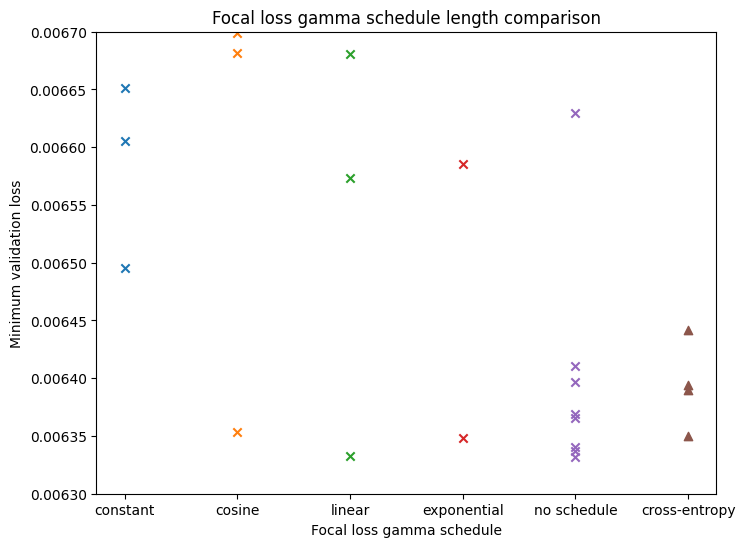

In [12]:
criterion = 'median_val_loss'

fig, ax = plt.subplots(figsize=(8,6))
x_labels = []
for i, schedule in enumerate(grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique()):
    schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']==schedule)
                                            & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==50)
                                            & (grid_search_focal_loss['train_focal_loss_gamma']==2.0))]
    ax.scatter(np.ones(len(schedule_df))*i, schedule_df[criterion], marker='x', label=schedule)
    x_labels.append(schedule)
# without schedule
schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==100)
                                        & (grid_search_focal_loss['train_focal_loss_gamma']==2.0))]
ax.scatter(np.ones(len(schedule_df))*i+1, schedule_df[criterion], marker='x', label='no schedule')
x_labels.append('no schedule')

# cross-entropy
schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma']==0.0))]
ax.scatter(np.ones(len(schedule_df))*i+2, schedule_df[criterion], marker='^', label='cross-entropy')
x_labels.append('cross-entropy')

ax.set_xlabel('Focal loss gamma schedule')
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

ax.set_ylabel('Minimum validation loss')
ax.set_title('Focal loss gamma schedule length comparison')
ax.set_ylim(0.0063, 0.0067)
# ax.set_yscale('log')
# ax.legend()

In [13]:
best_models = []
for i, schedule in enumerate(grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique()):
    schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']==schedule)
                                            & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==50)
                                            & (grid_search_focal_loss['train_focal_loss_gamma']==2.0))].copy().reset_index(drop=True)
    best = schedule_df.iloc[schedule_df['min_val_loss'].idxmin()].copy()
    best['model_type'] = schedule
    best_models.append(best)
# without schedule
schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==100)
                                        & (grid_search_focal_loss['train_focal_loss_gamma']==2.0))].copy().reset_index(drop=True)
best = schedule_df.iloc[schedule_df['min_val_loss'].idxmin()].copy()
best['model_type'] = 'no_schedule'
best_models.append(best)
# cross-entropy
schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma']==0.0))].copy().reset_index(drop=True)
best = schedule_df.iloc[schedule_df['min_val_loss'].idxmin()].copy()
best['model_type'] = 'cross_entropy'
best_models.append(best)

best_models_df = pd.DataFrame(best_models)

In [14]:
best_models_df[['model_type','train_lambda_reg', 'train_lr', 'train_lr_scheduler']]

,model_type,train_lambda_reg,train_lr,train_lr_scheduler
2,constant,0.001,0.0005,exponential
2,cosine,0.001,0.0005,exponential
2,linear,0.001,0.0005,exponential
2,exponential,0.001,0.0005,exponential
8,no_schedule,0.001,0.0020,constant
0,cross_entropy,0.001,0.0005,constant


In [15]:
best_models_df

,index,level,model_name,state,timestamp,build_activations,build_feature_cols,build_hidden_sizes,build_num_classes,build_target_cols,...,train_weights_data,val_loss_0,val_loss_1,score_best_epoch,score_val_loss,mean_val_loss,median_val_loss,max_val_loss,min_val_loss,model_type
2,603,L3-full,MLP,NaN,2025-12-07T13:36:26.824756-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,True,"[[1.6321971283670546e-08, 1.4361921847607938e-...","[[0.16230480206279327, 0.16119052046023238, 0....","(35, 49, 32, 46, 46)","(0.006875821132144611, 0.006495740356178878, 0...",0.006466,0.006496,0.006876,0.005956,constant
2,640,L3-full,MLP,NaN,2025-12-07T14:15:18.836938-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,True,"[[1.2561046394214089e-08, 1.5719947419046354e-...","[[0.1666392853465705, 0.15790134953995483, 0.1...","(21, 12, 25, 19, 23)","(0.006660067848989053, 0.0063532825202057205, ...",0.006261,0.006353,0.006660,0.005765,cosine
2,638,L3-full,MLP,NaN,2025-12-07T14:11:20.867001-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,True,"[[1.2802838138867892e-08, 1.4783167838524329e-...","[[0.16669366611078523, 0.15915829838274387, 0....","(23, 23, 20, 19, 32)","(0.006664500703553575, 0.006332627890755756, 0...",0.006253,0.006333,0.006665,0.005754,linear
2,604,L3-full,MLP,NaN,2025-12-07T13:39:20.157744-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,True,"[[9.692798018034016e-09, 1.610364497571016e-08...","[[0.17516497529733677, 0.15808590532491762, 0....","(28, 33, 37, 51, 55)","(0.006663819522471913, 0.006347936654677769, 0...",0.006255,0.006348,0.006664,0.005749,exponential
8,223,L3-full,MLP,NaN,2025-12-07T00:38:12.608326-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,True,"[[1.975533760363872e-08, 1.712548287305507e-08...","[[0.15168129674161965, 0.153655944921719, 0.15...","(16, 11, 11, 6, 16)","(0.006649136652542676, 0.007149929144280802, 0...",0.006462,0.006411,0.007150,0.005718,no_schedule
0,6,L3-full,MLP,NaN,2025-12-06T21:38:55.744325-05:00,"(relu, relu, relu, relu, relu, relu, relu, rel...","(1d_load_sum, 24h_max_load, 24h_min_load, 2d_l...","(128, 128, 64, 64, 64, 64, 64, 64, 64, 64, 64,...",2,"(Final_gen_state,)",...,True,"[[4.526574881556908e-09, 1.4144900489377171e-0...","[[0.24021192556752946, 0.16637418216790634, 0....","(21, 13, 26, 11, 31)","(0.007000069132643764, 0.0063871588426982085, ...",0.006411,0.006442,0.007000,0.005733,cross_entropy


### Versus gamma

<>:82: SyntaxWarning: invalid escape sequence '\g'
<>:82: SyntaxWarning: invalid escape sequence '\g'
/var/folders/6n/3dgg4xrs3xx6v3g6686g09nc0000gn/T/ipykernel_15719/881834859.py:82: SyntaxWarning: invalid escape sequence '\g'
  ax.set_xlabel('Initial focal loss $\gamma_0$')


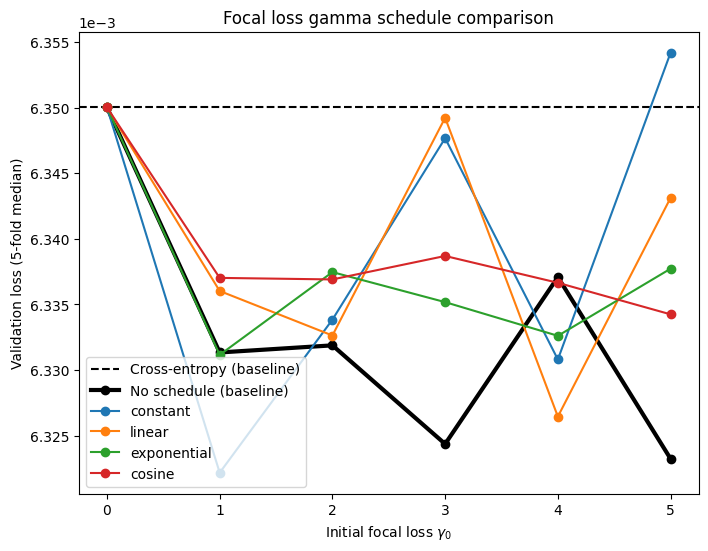

In [82]:
# criterion = 'mean_val_loss'
criterion = 'median_val_loss'
# criterion = 'max_val_loss'

grid_search_focal_loss, grid_search_raw_df = get_grid_search_df('../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_all_5folds.csv')
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['train_focal_loss_gamma_schedule_length'] > 0]
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['build_num_classes'] ==2]

grid_search_focal_loss = grid_search_focal_loss.reset_index(drop=True)

grid_search_focal_loss["mean_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: mean_ignore_nan(x))
grid_search_focal_loss["median_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: median_ignore_nan(x))
grid_search_focal_loss["max_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: max_ignore_nan(x))
grid_search_focal_loss["min_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: min_ignore_nan(x))

grid_search_focal_loss['mean_logit_loss'] = grid_search_focal_loss.apply(lambda row: mean_logit_score(row['val_loss_1'], row['score_best_epoch']), axis=1)
grid_search_focal_loss['min_logit_loss'] = grid_search_focal_loss.apply(lambda row: min_logit_score(row['val_loss_1'], row['score_best_epoch']), axis=1)
grid_search_focal_loss['max_logit_loss'] = grid_search_focal_loss.apply(lambda row: max_logit_score(row['val_loss_1'], row['score_best_epoch']), axis=1)

results = defaultdict(lambda: defaultdict(float))

# CE baseline
ce_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                   & (grid_search_focal_loss['train_focal_loss_gamma']==0.0)
                                   & (grid_search_focal_loss['train_focal_loss_alpha']==(1.0,1.0))
                                   & (grid_search_focal_loss['train_focal_loss_alpha_schedule']=='constant'))].copy().reset_index(drop=True)

ce_best = ce_df.iloc[ce_df[criterion].idxmin()]

start_gamma = grid_search_focal_loss['train_focal_loss_gamma'].unique().tolist()
start_gamma.sort()
# start_gamma =start_gamma[:-1]

# No gamma schedule
no_schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==100))].copy().reset_index(drop=True)

for gamma in start_gamma:
    gamma_df = no_schedule_df.loc[no_schedule_df['train_focal_loss_gamma']==gamma].copy().reset_index(drop=True)
    if len(gamma_df) == 0:
        continue
    best = gamma_df.iloc[gamma_df[criterion].idxmin()]
    results['no_schedule'][gamma] = best[criterion].item()

# With gamma schedules
for schedule in grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique():
    schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']==schedule)
                                            & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']<100))].copy().reset_index(drop=True)
    for gamma in start_gamma:
        if gamma == 0.0:
            results[schedule][0.0] = results['no_schedule'][0.0]
        gamma_df = schedule_df.loc[schedule_df['train_focal_loss_gamma']==gamma].copy().reset_index(drop=True)
        if len(gamma_df) == 0:
            continue
        best = gamma_df.iloc[gamma_df[criterion].idxmin()]
        results[schedule][gamma] = best[criterion].item()








results_df = pd.DataFrame(results).T
results_df = results_df.reindex(sorted(results_df.columns, key=lambda x: float(x)), axis=1)
results_df = results_df.reindex(['no_schedule', 'constant', 'linear', 'exponential', 'cosine'], axis=0)


fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(ce_best[criterion], color='black', linestyle='--', label='Cross-entropy (baseline)')
for schedule, row in results_df.iterrows():
    # row = row.dropna()
    gammas = row.index.tolist()
    val_losses = row.values.tolist()
    if schedule == 'no_schedule':
         ax.plot(gammas, val_losses, marker='o', color='black', linewidth=3, label='No schedule (baseline)')
    else:
        ax.plot(gammas, val_losses, marker='o', label=schedule)

ax.legend()
ax.set_xlabel('Initial focal loss $\gamma_0$')
ax.set_ylabel('Validation loss (5-fold median)')
ax.set_title('Focal loss gamma schedule comparison')
ax.set_xticks(start_gamma)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

### Versus schedule length

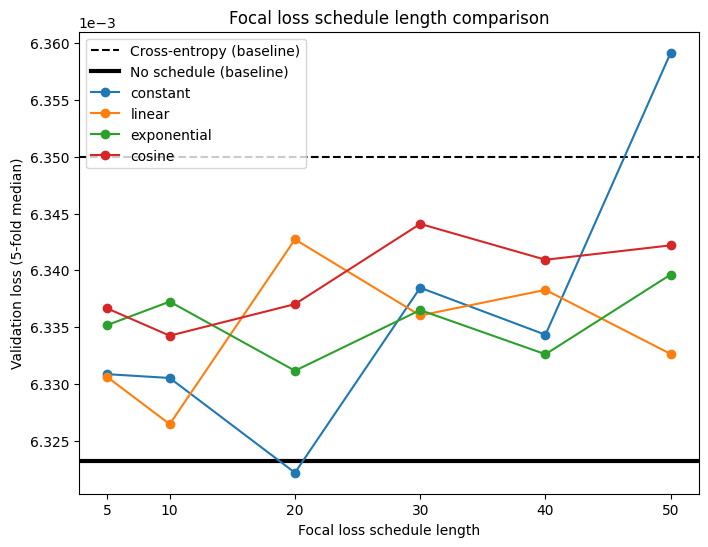

In [ ]:
# criterion = 'mean_val_loss'
criterion = 'median_val_loss'

grid_search_focal_loss, grid_search_raw_df = get_grid_search_df('../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_all_5folds.csv')
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['train_focal_loss_gamma_schedule_length'] > 0]
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['build_num_classes'] ==2]

grid_search_focal_loss = grid_search_focal_loss.reset_index(drop=True)

grid_search_focal_loss["mean_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: mean_ignore_nan(x))
grid_search_focal_loss["median_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: median_ignore_nan(x))
grid_search_focal_loss["max_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: max_ignore_nan(x))
grid_search_focal_loss["min_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: min_ignore_nan(x))

results = defaultdict(lambda: defaultdict(float))


# CE baseline
ce_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                   & (grid_search_focal_loss['train_focal_loss_gamma']==0.0)
                                   & (grid_search_focal_loss['train_focal_loss_alpha']==(1.0,1.0))
                                   & (grid_search_focal_loss['train_focal_loss_alpha_schedule']=='constant'))].copy().reset_index(drop=True)

ce_best = ce_df.iloc[ce_df[criterion].idxmin()]


schedule_lengths = grid_search_focal_loss['train_focal_loss_gamma_schedule_length'].unique().tolist()
schedule_lengths.sort()

# No gamma schedule
no_schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==100))].copy().reset_index(drop=True)

best_no_schedule = no_schedule_df.iloc[no_schedule_df[criterion].idxmin()]

# With gamma schedules
for schedule in grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique():
    schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']==schedule)
                                            & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']<100))].copy().reset_index(drop=True)
    for length in schedule_lengths:
        length_df = schedule_df.loc[schedule_df['train_focal_loss_gamma_schedule_length']==length].copy().reset_index(drop=True)
        if len(length_df) == 0:
            continue
        best = length_df.iloc[length_df[criterion].idxmin()]
        results[schedule][length] = best[criterion].item()






results_df = pd.DataFrame(results).T
results_df = results_df.reindex(sorted(results_df.columns, key=lambda x: float(x)), axis=1)
results_df = results_df.reindex(['constant', 'linear', 'exponential', 'cosine'], axis=0)


fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(ce_best[criterion], color='black', linestyle='--', label='Cross-entropy (baseline)')
ax.axhline(best_no_schedule[criterion], color='black', linewidth=3, label='No schedule (baseline)')
for schedule, row in results_df.iterrows():
    row = row.dropna()
    lengths = row.index.tolist()
    val_losses = row.values.tolist()
    ax.plot(lengths, val_losses, marker='o', label=schedule)

ax.legend()
ax.set_xlabel('Focal loss schedule length')
ax.set_ylabel('Validation loss (5-fold median)')
ax.set_title('Focal loss schedule length comparison')
ax.set_xticks(schedule_lengths[:-1])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

### Inter-fold variance

In [86]:
def variance_ignore_nan(lst):
    try:
        lst = np.array(lst)
        mean = np.mean([x for x in lst if not np.isnan(x)])
        n = len(lst)
        var = np.sum(np.power(lst-mean,2))/(n-1)
        return var
    except:
        return np.nan
    
def std_ignore_nan(lst):
    try:
        lst = np.array(lst)
        mean = np.mean([x for x in lst if not np.isnan(x)])
        n = len(lst)
        var = np.sum(np.power(lst-mean,2))/(n-1)
        return np.sqrt(var)
    except:
        return np.nan
    


<>:116: SyntaxWarning: invalid escape sequence '\g'
<>:116: SyntaxWarning: invalid escape sequence '\g'
/var/folders/6n/3dgg4xrs3xx6v3g6686g09nc0000gn/T/ipykernel_15719/3975020749.py:116: SyntaxWarning: invalid escape sequence '\g'
  ax.set_xlabel('Initial focal loss $\gamma_0$')


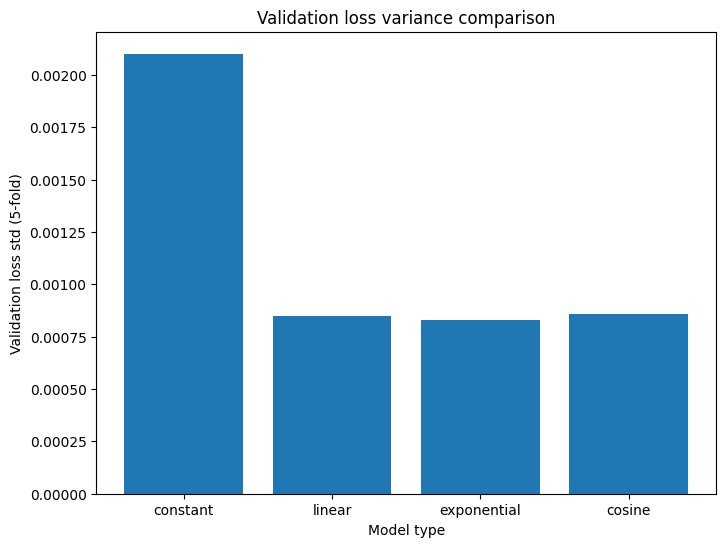

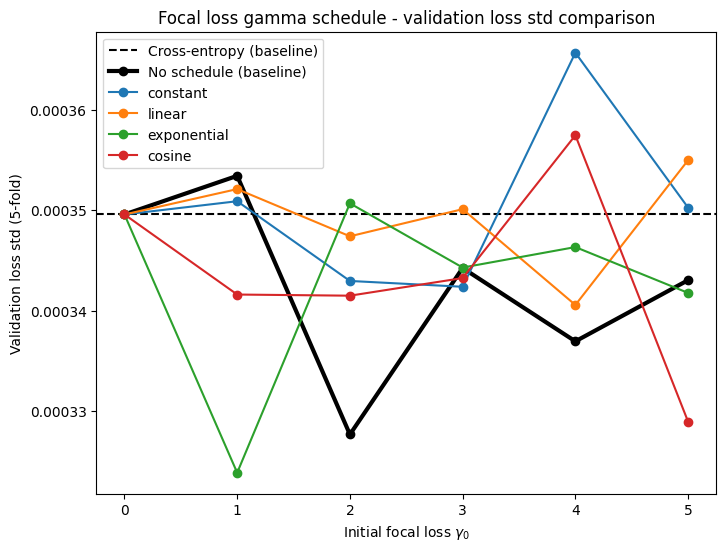

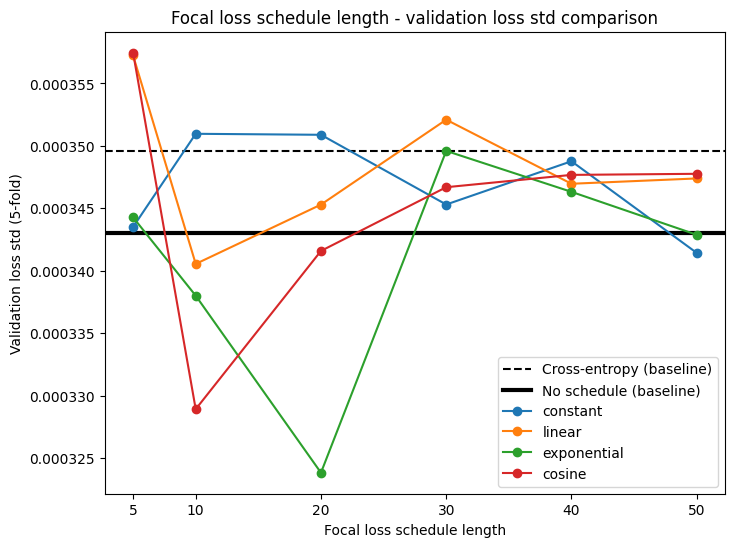

In [103]:
# criterion = 'mean_val_loss'
criterion = 'median_val_loss'
criterion_std = 'std_val_loss'

grid_search_focal_loss, grid_search_raw_df = get_grid_search_df('../Results/Grid_search/grid_search_log_mlp_New York_thermal_A_all_5folds.csv')
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['train_focal_loss_gamma_schedule_length'] > 0]
grid_search_focal_loss = grid_search_focal_loss.loc[grid_search_focal_loss['build_num_classes'] ==2]

grid_search_focal_loss = grid_search_focal_loss.reset_index(drop=True)

grid_search_focal_loss["mean_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: mean_ignore_nan(x))
grid_search_focal_loss["median_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: median_ignore_nan(x))
grid_search_focal_loss["max_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: max_ignore_nan(x))
grid_search_focal_loss["min_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: min_ignore_nan(x))
grid_search_focal_loss["variance_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: variance_ignore_nan(x))
grid_search_focal_loss["std_val_loss"] = grid_search_focal_loss['score_val_loss'].apply(lambda x: std_ignore_nan(x))


results_all = defaultdict(list)
results_by_gamma = defaultdict(lambda: defaultdict(float))
results_by_length = defaultdict(lambda: defaultdict(float))

start_gamma = grid_search_focal_loss['train_focal_loss_gamma'].unique().tolist()
start_gamma.sort()
schedule_lengths = grid_search_focal_loss['train_focal_loss_gamma_schedule_length'].unique().tolist()
schedule_lengths.sort()

# CE baseline
ce_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                   & (grid_search_focal_loss['train_focal_loss_gamma']==0.0)
                                   & (grid_search_focal_loss['train_focal_loss_alpha']==(1.0,1.0))
                                   & (grid_search_focal_loss['train_focal_loss_alpha_schedule']=='constant'))].copy().reset_index(drop=True)

results_all["ce_baseline"] = [np.mean(ce_df[criterion_std].values.tolist())]
ce_best = ce_df.iloc[ce_df[criterion].idxmin()]
results_by_gamma["ce_baseline"] = ce_best[criterion_std].item()
results_by_length["ce_baseline"] = ce_best[criterion_std].item()


# No gamma schedule
no_schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']=='constant')
                                        & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']==100))].copy().reset_index(drop=True)

results_all["no_schedule"] = [np.mean(no_schedule_df[criterion_std].values.tolist())]

best_no_schedule = no_schedule_df.iloc[no_schedule_df[criterion].idxmin()]
results_by_length["no_schedule"] = best_no_schedule[criterion_std].item()

for gamma in start_gamma:
    gamma_df = no_schedule_df.loc[no_schedule_df['train_focal_loss_gamma']==gamma].copy().reset_index(drop=True)
    if len(gamma_df) == 0:
        continue
    best = gamma_df.iloc[gamma_df[criterion].idxmin()]
    results_by_gamma['no_schedule'][gamma] = best[criterion_std].item()




# With gamma schedules
for schedule in grid_search_focal_loss['train_focal_loss_gamma_schedule'].unique():
    schedule_df = grid_search_focal_loss.loc[((grid_search_focal_loss['train_focal_loss_gamma_schedule']==schedule)
                                            & (grid_search_focal_loss['train_focal_loss_gamma_schedule_length']<100))].copy().reset_index(drop=True)
    
    results_all[schedule] = [np.mean(schedule_df[criterion_std].values.tolist())]

    for gamma in start_gamma:
        if gamma == 0.0:
            results_by_gamma[schedule][0.0] = results_by_gamma['no_schedule'][0.0]
            continue
        gamma_df = schedule_df.loc[schedule_df['train_focal_loss_gamma']==gamma].copy().reset_index(drop=True)
        if len(gamma_df) == 0:
            continue
        best = gamma_df.iloc[gamma_df[criterion].idxmin()]
        results_by_gamma[schedule][gamma] = best[criterion_std].item()


    for length in schedule_lengths:
        length_df = schedule_df.loc[schedule_df['train_focal_loss_gamma_schedule_length']==length].copy().reset_index(drop=True)
        if len(length_df) == 0:
            continue
        best = length_df.iloc[length_df[criterion].idxmin()]
        results_by_length[schedule][length] = best[criterion_std].item()


# Plot std overall

results_all_df = pd.DataFrame(results_all).T
results_all_df = results_all_df.reindex(sorted(results_all_df.columns, key=lambda x: float(x)), axis=1)
results_all_df = results_all_df.reindex(['constant', 'linear', 'exponential', 'cosine'], axis=0)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(results_all_df.index.tolist(), results_all_df[0].values.tolist())
ax.set_xlabel('Model type')
ax.set_ylabel('Validation loss std (5-fold)')
ax.set_title('Validation loss variance comparison')
plt.show()

# plot std by gamma
std_ce_gamma = results_by_gamma['ce_baseline']
del results_by_gamma['ce_baseline']
results_by_gamma_df = pd.DataFrame(results_by_gamma).T
results_by_gamma_df = results_by_gamma_df.reindex(sorted(results_by_gamma_df.columns, key=lambda x: float(x)), axis=1)
results_by_gamma_df = results_by_gamma_df.reindex(['no_schedule', 'constant', 'linear', 'exponential', 'cosine'], axis=0)

fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(std_ce_gamma, color='black', linestyle='--', label='Cross-entropy (baseline)')
for schedule, row in results_by_gamma_df.iterrows():
    # row = row.dropna()
    gammas = row.index.tolist()
    val_stds = row.values.tolist()
    if schedule == 'no_schedule':
         ax.plot(gammas, val_stds, marker='o', color='black', linewidth=3, label='No schedule (baseline)')
    else:
        ax.plot(gammas, val_stds, marker='o', label=schedule)
ax.legend()
ax.set_xlabel('Initial focal loss $\gamma_0$')
ax.set_ylabel('Validation loss std (5-fold)')
ax.set_title('Focal loss gamma schedule - validation loss std comparison')
ax.set_xticks(start_gamma)
plt.show()

# plot std by schedule length
std_ce_length = results_by_length['ce_baseline']
del results_by_length['ce_baseline']
std_no_schedule_length = results_by_length['no_schedule']
del results_by_length['no_schedule']

results_by_length_df = pd.DataFrame(results_by_length).T
results_by_length_df = results_by_length_df.reindex(sorted(results_by_length_df.columns, key=lambda x: float(x)), axis=1)
results_by_length_df = results_by_length_df.reindex(['constant', 'linear', 'exponential', 'cosine'], axis=0)

fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(std_ce_length, color='black', linestyle='--', label='Cross-entropy (baseline)')
ax.axhline(std_no_schedule_length, color='black', linewidth=3, label='No schedule (baseline)')
for schedule, row in results_by_length_df.iterrows():
    # row = row.dropna()
    lengths = row.index.tolist()
    val_stds = row.values.tolist()
    ax.plot(lengths, val_stds, marker='o', label=schedule)
ax.legend()
ax.set_xlabel('Focal loss schedule length')
ax.set_ylabel('Validation loss std (5-fold)')
ax.set_title('Focal loss schedule length - validation loss std comparison')
ax.set_xticks(schedule_lengths[:-1])
plt.show()


In [100]:
results_by_gamma_df

,0.0,1.0,2.0,3.0,4.0,5.0
no_schedule,0.00035,0.000353,0.000328,0.000344,0.000337,0.000343
constant,NaN,0.000351,0.000343,0.000342,0.000366,0.000350
cosine,NaN,0.000342,0.000341,0.000343,0.000357,0.000329
linear,NaN,0.000352,0.000347,0.000350,0.000341,0.000355
exponential,NaN,0.000324,0.000351,0.000344,0.000346,0.000342


## Schedules plot

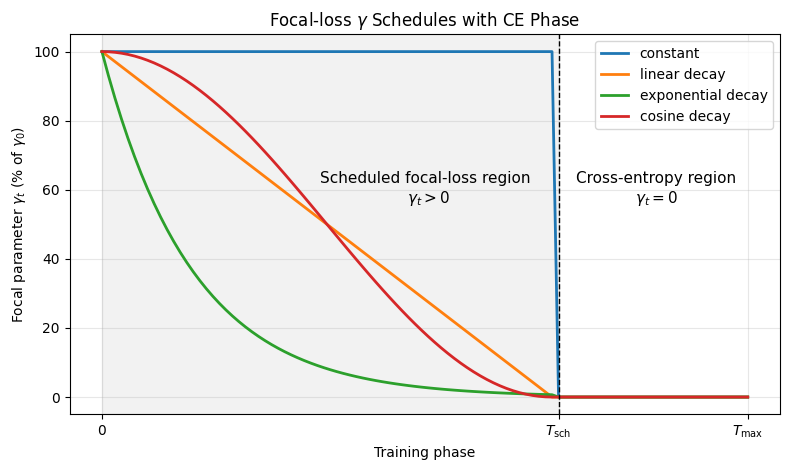

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
gamma0 = 100.0
T_max = 100       # total number of epochs
T_sch = 70        # schedule length (epochs with gamma > 0)

epochs = np.arange(T_max)

# -------------------------------
# Initialize all schedules at 0
# -------------------------------
gamma_const = np.zeros(T_max)
gamma_lin   = np.zeros(T_max)
gamma_exp   = np.zeros(T_max)
gamma_cos   = np.zeros(T_max)

# Only define non-zero part on [0, T_sch)
t = np.arange(T_sch)

# Constant schedule
gamma_const[:T_sch] = gamma0

# Linear decay
gamma_lin[:T_sch] = gamma0 * (1 - t / (T_sch - 1))

# Exponential decay
alpha = 5.0
gamma_exp[:T_sch] = gamma0 * np.exp(-alpha * t / (T_sch - 1))

# Cosine decay
gamma_cos[:T_sch] = gamma0 * (1 + np.cos(np.pi * t / (T_sch - 1))) / 2

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(8, 4.8))

plt.plot(epochs, gamma_const, label="constant", linewidth=2)
plt.plot(epochs, gamma_lin,   label="linear decay", linewidth=2)
plt.plot(epochs, gamma_exp,   label="exponential decay", linewidth=2)
plt.plot(epochs, gamma_cos,   label="cosine decay", linewidth=2)

# Vertical line at T_sch
plt.axvline(T_sch, linestyle="--", color="black", linewidth=1)

# Shade scheduled region
plt.axvspan(0, T_sch, alpha=0.10, color="gray")

# -------------------------------
# Region Annotations
# -------------------------------
plt.text(
    T_sch/2+15, gamma0*0.60,
    "Scheduled focal-loss region \n$\\gamma_t > 0$",
    # r"Scheduled focal-loss region $0 \\le t < T_{\\text{sch}}$",
    ha="center", va="center", fontsize=11
)

plt.text(
    (T_sch + T_max)/2, gamma0*0.60,
    "Cross-entropy region\n$\\gamma_t = 0$",
    ha="center", va="center", fontsize=11
)

# -------------------------------
# Axis formatting
# -------------------------------
plt.xlabel("Training phase")
plt.ylabel(r"Focal parameter $\gamma_t$ (% of $\gamma_0$)")
plt.title(r"Focal-loss $\gamma$ Schedules with CE Phase")

plt.xticks(
    [0, T_sch, T_max-1],
    [r"$0$", r"$T_{\text{sch}}$", r"$T_{\max}$"]
)

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# plt.savefig("gamma_schedules_annotated.png", dpi=300)
plt.show()